# SYSC4415 Introduction to Machine Learning Answer Key
## Assignment 1
|**Student name** | **Student number**|
|-----------------|-------------------|
| Noel Boban|101022826  |

# Question 1
 > i) Calculate the gradient of the following function: 
$$ f(x,y,z) \stackrel{\text{def}}{=} z^3 + x^2y-y^2 + 3yz $$

>  ii) What is the gradient at (-2,3,1) 

>  iii)What does this vector represent?

i) df/dx = 2x
   df/dy = (x^2) - 2y + 3z
   df/dz = 3(z^2) + 3y
    
    gradient of f(x,y,z) = [ 2x
                             (x^2) - 2y + 3z
                             3(z^2) + 3y ]

ii) The gradient of f(x,y,z) at (-2,3,1) is :  
               
               [ -4
                  1
                  12 ]

iii) This vector represents the direction of steepest ascent in the
      function 
$$ f(x,y,z) \stackrel{\text{def}}{=} z^3 + x^2y-y^2 + 3yz $$

# Question 2
*(see text of question in assignment instructions)*

>a.   What is the expected value from this sample? Using an unbiased estimator, what is the sample variance and standard deviation?

>b.   What is $Pr(3)$?

>c.   Find the expected value and the variance for $Pr(x)$.

>d.   Find the probability that a student slept 2 hours the night before ($x=2$), given that they did not need excess amounts of coffee. That is, find $Pr(2|-)$. Hint: $Pr(+)$ can be found by summing over $Pr(+|x)Pr(x)$, for all $x$. $Pr(-|x)$ can be derived from $Pr(+|x)$.

a) $$E(X) = \sum_{i=1}^{N}{xp(x)}$$
      
          = 0.3 + 0.6 + 0.6 + 0.4 + 0.5
$$ \mu = 2.4 $$  

$${\sigma}^2 = 1.822 $$
$$\sigma = 1.349 $$

b) 
$$\sum_{i=1}^{N}{Pr(x)} = 1 $$

        Pr(3) = 1 - (0.25 + 0.3 + 0.1 + 0.15)
              = 0.2

c) $$E(X) = \sum_{i=1}^{N}{xp(x)}$$

          = 0.25 + 0.6 + 0.6 + 0.4 + 0.75
$$ \mu = 2.6 $$
$${\sigma}^2 = E[(x - \mu)^2] = \sum_{i=1}^{N}{(x - \mu)^2p(x)} = 1.84 $$


d) 

#Question 3

Create a python notebook which loads the Kaggle Diabetes dataset (https://www.kaggle.com/mathchi/diabetes-data-set). This dataset has 8 features and 2 classes of diabetes possibility: Outcome: 0= doesnt't have diabetes; 1= has diabetes. *Hint: look at the notebooks from Tutorials 2 & 3 for example code for achieving the steps below.* 

>  a) Split the data, using 75% for training and 25% for test. Make sure you use stratified sampling. 

>  b) Train and test a logistic regression classifier. How accurate is your classifier?

>  c) Repeat part b), only the Pregnancies and SkinThickness features from the dataset. Was the classifier accuracy impacted?
  
>  d) Using the (two feature) classifier from part c), create two subplots using the Preganancies and SkinThickness features from the dataset.

>> i)  On the first, plot the decision boundary and the training data. Use green for doesn't have diabetes (Outcome==0) and blue for Has diabetes (Outcome==1).

>> ii) On the second, plot the decision boundary and the test data. Use the same colours (blue/green), but highlight all misclassified test points (from either class) in red.




In [409]:
# Load libraries...
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

## Q3.a) Create the dataset

The first step is loading the Kaggle Diabetes data. We will then split off the test data to be used for all training sets. Then create each training set, using **stratified sampling**

In [410]:
# Load the Kaggle Diabetes dataset
kaggleData = pd.read_csv('diabetes.csv', na_values=['NA'])
diabetes_data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [411]:
df = pd.DataFrame(kaggleData, columns= ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])

pregnancies    = df['Pregnancies']
glucose        = df['Glucose']
bloodPressure  = df['BloodPressure']
skinThickness  = df['SkinThickness']
insulin        = df['Insulin']
BMI            = df['BMI']
diabetesPedigreeFunction = df['DiabetesPedigreeFunction']
age        = df['Age']
outcome    = df['Outcome']

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


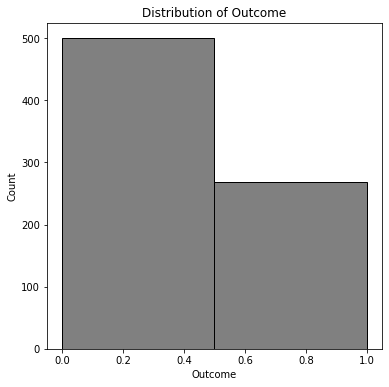

In [412]:
var2plot = 'Outcome' 

plt.figure(figsize= (6,6))
plt.hist(df[var2plot], bins=2, color= 'grey', edgecolor= 'black')
plt.xlabel(var2plot)
plt.ylabel("Count")
plt.title(f"Distribution of {var2plot}")
plt.show()

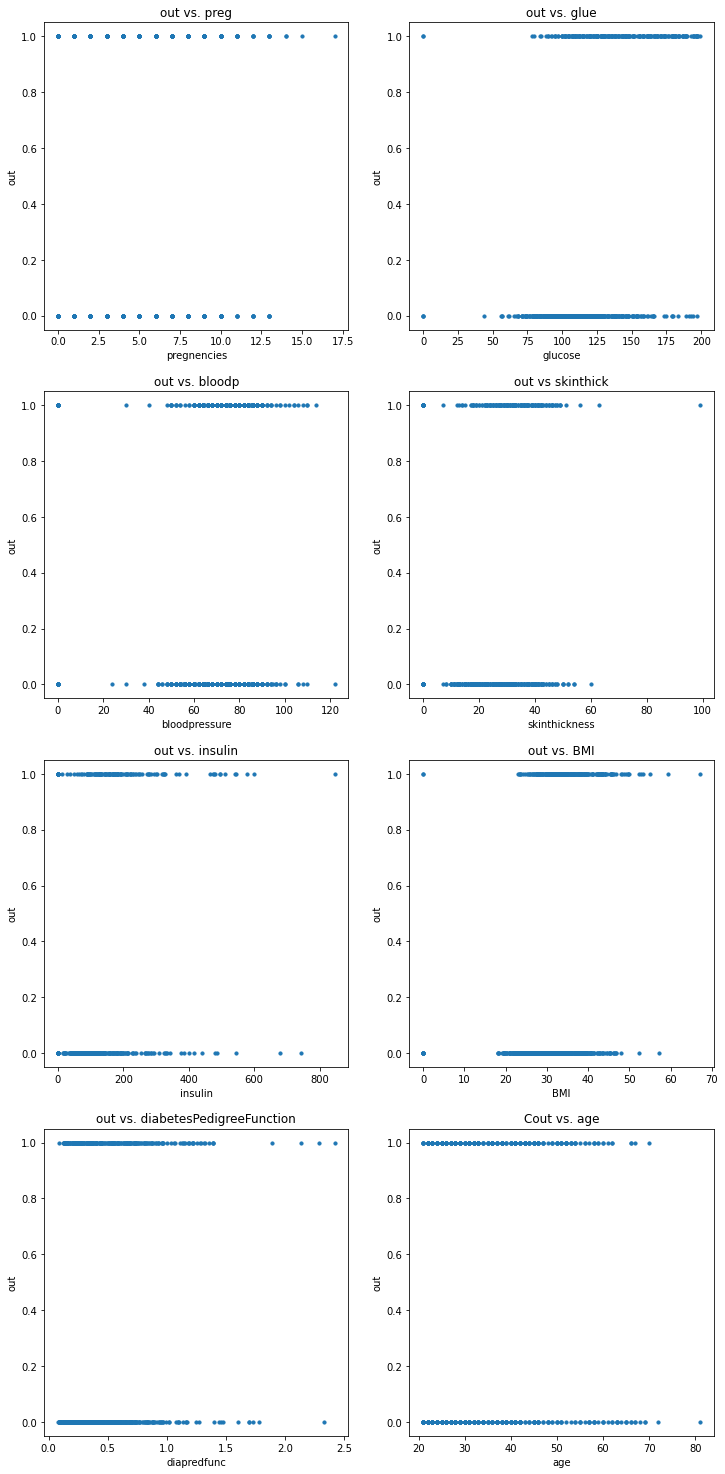

In [413]:
plt.figure(figsize= (12,26))

plt.subplot(4, 2, 1); plt.scatter(pregnancies, outcome, s=10); plt.xlabel("pregnencies"); plt.ylabel("out"); plt.title("out vs. preg")
plt.subplot(4, 2, 2); plt.scatter(glucose, outcome, s=10); plt.xlabel("glucose"); plt.ylabel("out"); plt.title("out vs. glue")
plt.subplot(4, 2, 3); plt.scatter(bloodPressure, outcome, s=10); plt.xlabel("bloodpressure"); plt.ylabel("out"); plt.title("out vs. bloodp")
plt.subplot(4, 2, 4); plt.scatter(skinThickness, outcome, s=10); plt.xlabel("skinthickness"); plt.ylabel("out"); plt.title("out vs skinthick")
plt.subplot(4, 2, 5); plt.scatter(insulin, outcome, s=10); plt.xlabel("insulin"); plt.ylabel("out"); plt.title("out vs. insulin")
plt.subplot(4, 2, 6); plt.scatter(BMI, outcome, s=10); plt.xlabel("BMI"); plt.ylabel("out"); plt.title("out vs. BMI")
plt.subplot(4, 2, 7); plt.scatter(diabetesPedigreeFunction, outcome, s=10); plt.xlabel("diapredfunc"); plt.ylabel("out"); plt.title("out vs. diabetesPedigreeFunction")
plt.subplot(4, 2, 8); plt.scatter(age, outcome, s=10); plt.xlabel("age"); plt.ylabel("out"); plt.title("Cout vs. age")

plt.show()

In [414]:
x = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']

# Partition training and testing data sets
samples    = x.shape[0]       # returns number of samples
szTraining = int(samples*0.75) # 75% training samples
trainX     = x[0:szTraining]
trainY     = y[0:szTraining]
testX      = x[szTraining:] # rest 25% test set
testY      = y[szTraining:]

# Construct model using all features
logitModel = sm.Logit(trainY,trainX)
result     = logitModel.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.602496
         Iterations 5
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.064     
Dependent Variable:    Outcome            AIC:                710.0749  
Date:                  2021-10-12 01:41   BIC:                744.9237  
No. Observations:      576                Log-Likelihood:     -347.04   
Df Model:              7                  LL-Null:            -370.65   
Df Residuals:          568                LLR p-value:        5.0399e-08
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        5.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Pregnancies               0.1384   0.0335  4.1264 0

In [415]:
predY = result.predict(testX).round()
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(testY, predY)))

Accuracy of logistic regression classifier on test set: 0.67


In [416]:
# Select only important features(pregnencies and skinthickness) to use in model
trainX2    = trainX[['Pregnancies', 'SkinThickness']]
testX2     = testX[['Pregnancies', 'SkinThickness']]
logitModel = sm.Logit(trainY,trainX2) 
result     = logitModel.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.670583
         Iterations 4
                        Results: Logit
Model:              Logit            Pseudo R-squared: -0.042  
Dependent Variable: Outcome          AIC:              776.5114
Date:               2021-10-12 01:41 BIC:              785.2236
No. Observations:   576              Log-Likelihood:   -386.26 
Df Model:           1                LL-Null:          -370.65 
Df Residuals:       574              LLR p-value:      1.0000  
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     4.0000                                     
---------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------
Pregnancies      0.0135   0.0203  0.6656 0.5057 -0.0263  0.0533
SkinThickness   -0.0182   0.0041 -4.4470 0.0000 -0.0262 -0.0102



In [417]:
predY = result.predict(testX2).round()
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(testY, predY)))

Accuracy of logistic regression classifier on test set: 0.59


In [418]:
df_new = df[['Pregnancies', 'SkinThickness', 'Outcome']]

# Question 4

Linear regression. Download the file “Assig1Q4.csv” from GitHub under “Assignments/Assignment1”. The first column represents the X values, while the second column represents the Y values.

>  a) Plot the data

We are going to use linear regression to fit a linear and a cubic model to these data.

>  b) Without using sklearn.linear_model (or any other linear regression libraries), write your own python code to implement the least squares solution for linear regression. That is:
$$\beta=(X^TX)^{−1}X^Ty$$

>  c) Assuming the model $y=mx+b$, use your code to best-fit the parameters $m$ and $b$ to the data. Report your optimal parameter values. 
Hints: 
  * recall that you must create the ‘augmented’ feature vector $X$ from the given $x$ data (add a column of 1’s). 
  * look at numpy.T(), numpy.matmul(), numpy.dot(), and numpy.linalg.inv()


>  d) Plot your line of best fit on top of the data

>  e) Calculate the sum of square residuals, or mean squared error, as in:

$$MSE(\beta) = \sum_{i=1}^{N}{(y−X\beta)^2}$$
>  f) Assuming the model $y=ax^3+bx^2+cx+d$, repeat steps b-e using this new 
  model (i.e. estimate the optimal values for $a$,$b$,$c$,$d$; report those estimates; plot the line of best fit; report the MSE).

>  g) Briefly discuss which model would you prefer for these data?

>  h) Why is best-fitting the second (cubic) model still considered linear regression?



## Step 1: Load the CSV file

In [419]:
import pandas as pd
data = pd.read_csv("Assig1Q4.csv", names=['X', 'Y'])

df3 = pd.DataFrame(data, columns= ['X', 'Y'])

X    = df3['X']
Y    = df3['Y']

n = len(X)

In [420]:
data.head()

,X,Y
0,-0.980285,-6.404850
1,2.829586,0.837459
2,-1.886131,-31.966699
3,-7.138179,-455.955159
4,3.404920,-3.133424


Text(0.5, 1.0, 'X vs Y')

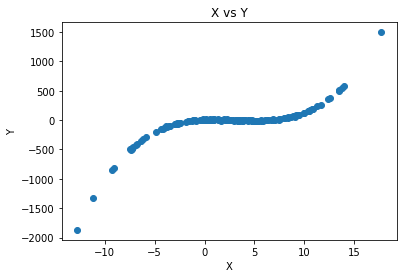

In [421]:
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('X vs Y')

## Step 2: Linear model $y=mx+b$

In [422]:
X_mean = np.mean(X)
Y_mean = np.mean(Y)

num = 0
den = 0
for i in range(len(X)):
    num += (X[i] - X_mean)*(Y[i] - Y_mean)
    den += (X[i] - X_mean)**2
m = num / den
b = Y_mean - m*X_mean

print (m, b)

39.48091183057875 -125.20965815944881


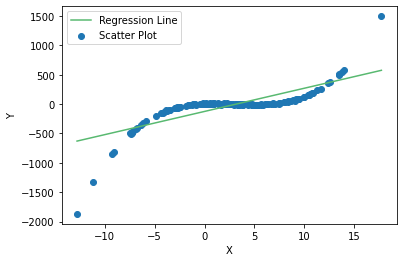

In [423]:
max_x = np.max(X) 
min_x = np.min(X) 

x = np.linspace(min_x, max_x, 200)
y = b + m * x

plt.plot(x, y, color='#58b970', label='Regression Line')
plt.scatter(X, Y, label='Scatter Plot')
 
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [424]:
mse = 0
for i in range(n):
    y_pred = b + m * X[i]
    mse += (Y[i] - y_pred) ** 2
mse = mse/n
print(f"MSE : {mse}")

MSE : 34193.06122162066


## Step 3: Cubic model $y=ax^3+bx^2+cx+d$

In [425]:
# Augment the x vector

# Compute beta

# Compute the MSE

#print("MSE =", MSE_quad)

# Question 5

- Create a Jupyter Notebook based on `Tutorial-3_ComparingMultipleClassifiers.ipynb` to use `make_classification` to create a linearly separable dataset, with 2 classes, 2 informative features, 1500 samples per class, using a class_sep=1.7, and a random_state of 5. 
- Generate some random noise of the same shape as your feature data, drawn from a standard normal distribution (see `numpy.random`) and a random_state of 5. 
- Create four datasets: 
    1. no noise, 
    2. data + 0.5 * noise, 
    3. data + 1.0 * noise, 
    4. data + 2.0 * noise. 

> a) For all four datasets, plot the data, labelling each (sub)plot by the degree of noise added (i.e. 0, 0.5, 1.0, and 2.0)

> b) For each dataset, create training and test data using a 70/30 train/test split (see train_test_split).

> c) For each dataset, train and test an SVM classifier with a polynomial kernel with `degree=2`, and `C=1.0`. Report the test score for each. How does prediction accuracy change with noise level?

> d) For a noise level of 0.5, train and test SVM classifiers using the following values for $C: \{0.001, 0.01, 0.1, 1, 10, 100\}$. 
   - Report the test accuracy for each. 
   - How does performance vary with $C$?
   - Briefly describe what the $C$ controls for sklearn.svc. *Hint: look at the documentation for `sklearn.svc` rather than the class notes here...*


In [426]:
# Load the required libraries...
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification


In [427]:
X, y = make_classification(n_samples=1500, n_features=2, n_redundant=0, n_classes=2, n_informative=2,
                           random_state=5, n_clusters_per_class=1, class_sep=1.5)



In [428]:
rng = np.random.RandomState(5) # Initialize random number generator
Xn1 = X + 0.5 * rng.uniform(size=X.shape) # Add noise to the feature X
Xn2 = X + 1 * rng.uniform(size=X.shape) # Add noise to the feature X
Xn3 = X + 2 * rng.uniform(size=X.shape) # Add noise to the feature X


In [429]:
lin_sep = (X, y)
n_lin_sep1 = (Xn1, y)
n_lin_sep2 = (Xn2, y)
n_lin_sep3 = (Xn3, y)

datasets = [lin_sep, n_lin_sep1, n_lin_sep2, n_lin_sep3]
dataset_names= ["Linearly Separable", "Noisy Linearly Separable1", "Noisy Linearly Separable2", "Noisy Linearly Separable3"]

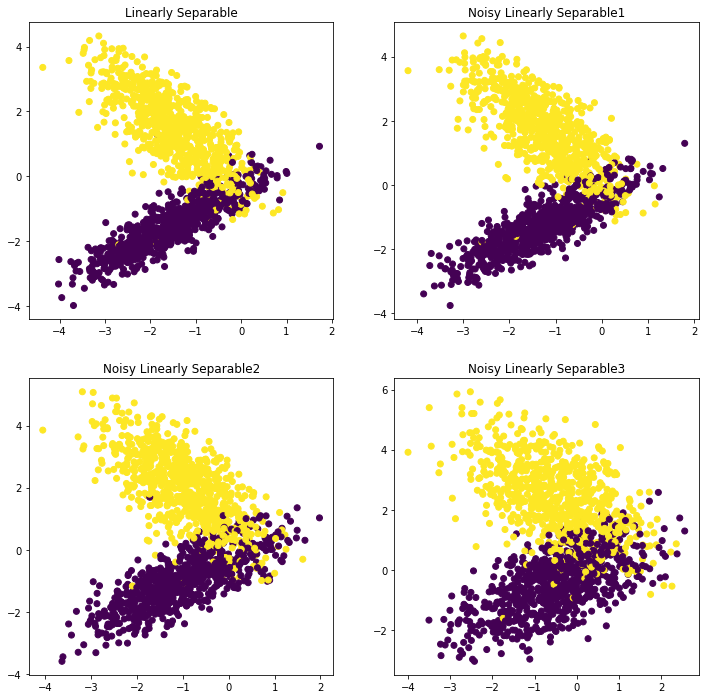

In [430]:
plt.figure(figsize=(12,12))
subplot_dim = (2,2) # For a 2x2 plot
for i in range(len(datasets)):
  #Plot each dataset
  plt.subplot(subplot_dim[0], subplot_dim[1], i+1)
  plt.scatter(datasets[i][0][0:,0], datasets[i][0][0:,1], c=datasets[i][1])
  plt.title(dataset_names[i])

In [431]:
#no noise
X = StandardScaler().fit_transform(X) # Standardize features by removing the mean and scaling to unit variance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3) # handy function

#data + 0.5*noise
Xn1 = StandardScaler().fit_transform(Xn1) # Standardize features by removing the mean and scaling to unit variance
X_train1, X_test1, y_train1, y_test1 = train_test_split(Xn1, y, test_size=.3) # handy function

#data + 1*noise
Xn2 = StandardScaler().fit_transform(Xn2) # Standardize features by removing the mean and scaling to unit variance
X_train2, X_test2, y_train2, y_test2 = train_test_split(Xn2, y, test_size=.3) # handy function

#data + 2*noise
Xn3 = StandardScaler().fit_transform(Xn3) # Standardize features by removing the mean and scaling to unit variance
X_train3, X_test3, y_train3, y_test3 = train_test_split(Xn3, y, test_size=.3) # handy function

In [432]:

model1 = SVC(kernel="poly", degree=2, C=1)


In [433]:
#no noise
model1.fit(X_train, y_train)
score1 = model1.score(X_test, y_test)
print(score1)

#data + 0.5*noise
model1.fit(X_train1, y_train1)
score2 = model1.score(X_test1, y_test1)
print(score2)

#data + 1*noise
model1.fit(X_train2, y_train2)
score3 = model1.score(X_test2, y_test2)
print(score3)

#data + 2*noise
model1.fit(X_train3, y_train3)
score4 = model1.score(X_test3, y_test3)
print(score4)

0.5844444444444444
0.5688888888888889
0.5555555555555556
0.5622222222222222


In [434]:
model2 = SVC(kernel= 'poly', degree=2 , C=0.001)
model3 = SVC(kernel= 'poly', degree=2 , C=0.01)
model4 = SVC(kernel= 'poly', degree=2 , C=0.1)
model5 = SVC(kernel= 'poly', degree=2 , C=1)
model6 = SVC(kernel= 'poly', degree=2 , C=10)
model7 = SVC(kernel= 'poly', degree=2 , C=100)

In [435]:
# C = 0.001
model2.fit(X_train1, y_train1)
score4 = model1.score(X_test1, y_test1)
print(score4)

# C = 0.01
model3.fit(X_train1, y_train1)
score5 = model1.score(X_test1, y_test1)
print(score5)

# C = 0.1
model4.fit(X_train1, y_train1)
score6 = model1.score(X_test1, y_test1)
print(score6)

# C = 1
model5.fit(X_train1, y_train1)
score7 = model1.score(X_test1, y_test1)
print(score7)

# C = 10
model6.fit(X_train1, y_train1)
score8 = model1.score(X_test1, y_test1)
print(score8)

# C = 10
model7.fit(X_train1, y_train1)
score9 = model1.score(X_test1, y_test1)
print(score9)

0.5533333333333333
0.5533333333333333
0.5533333333333333
0.5533333333333333
0.5533333333333333
0.5533333333333333
